In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

In [2]:
cmt_df=pd.read_csv("commits_new.csv",infer_datetime_format=True)

In [4]:
cmt_df.head(7)

,cmt_id,repo_id,cmt_commit_hash,cmt_author_name,cmt_author_raw_email,cmt_author_email,cmt_author_date,cmt_author_affiliation,cmt_committer_name,cmt_committer_raw_email,...,cmt_date_attempted,cmt_ght_author_id,cmt_ght_committer_id,cmt_ght_committed_at,tool_source,tool_version,data_source,data_collection_date,cmt_author_timestamp,cmt_committer_timestamp
0,34304725,25433,0597b8c0eea09f494d2723c12e0ec4336ff148d4,Sean P. Goggins,s@goggins.com,s@goggins.com,2019-06-22,NaN,GitHub,noreply@github.com,...,2019-06-22 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-06-22 15:37:20+02,2019-06-22 15:37:20+02
1,34304726,25433,689593cfdc260b353fb54b6e4952ac387b75be01,Georg J.P. Link,linkgeorg@gmail.com,linkgeorg@gmail.com,2019-07-29,NaN,GitHub,noreply@github.com,...,2019-07-29 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-07-29 20:49:46+02,2019-07-29 20:49:46+02
2,34304727,25433,a77fb07ec053183bd2d71e6a751e9e53e7a4cd29,Matt Germonprez,germonprez@gmail.com,germonprez@gmail.com,2019-08-02,NaN,GitHub,noreply@github.com,...,2019-08-02 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-08-02 13:29:20+02,2019-08-02 13:29:20+02
3,34304728,25433,1465ca8c219783adcdbd90673a728c9a43c45bea,Matt Snell,msnell@unomaha.edu,msnell@unomaha.edu,2019-03-26,NaN,GitHub,noreply@github.com,...,2019-03-26 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-03-26 11:31:18+02,2019-03-26 11:31:18+02
4,34304729,25433,f2757c9ac4ba2f056fc76d52636c17aa5beba48e,Matt Germonprez,germonprez@gmail.com,germonprez@gmail.com,2019-08-02,NaN,GitHub,noreply@github.com,...,2019-08-02 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-08-02 13:27:38+02,2019-08-02 13:27:38+02
5,34304730,25433,c93694c12c7c043f1a86152aff531e2a7ee887a1,Matt Snell,msnell@unomaha.edu,msnell@unomaha.edu,2019-03-25,NaN,GitHub,noreply@github.com,...,2019-03-25 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-03-25 15:16:32+02,2019-03-25 15:16:32+02
6,34304731,25433,625954c529b9a9ba104cb97ce5b7a8946430b66b,Sean P. Goggins,s@goggins.com,s@goggins.com,2019-07-24,NaN,GitHub,noreply@github.com,...,2019-07-24 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-07-24 09:45:58+02,2019-07-24 09:45:58+02


In [5]:
cmt_df.columns = cmt_df.columns.str.strip()
cmt_df.columns

Index(['cmt_id', 'repo_id', 'cmt_commit_hash', 'cmt_author_name',
       'cmt_author_raw_email', 'cmt_author_email', 'cmt_author_date',
       'cmt_author_affiliation', 'cmt_committer_name',
       'cmt_committer_raw_email', 'cmt_committer_email', 'cmt_committer_date',
       'cmt_committer_affiliation', 'cmt_added', 'cmt_removed',
       'cmt_whitespace', 'cmt_filename', 'cmt_date_attempted',
       'cmt_ght_author_id', 'cmt_ght_committer_id', 'cmt_ght_committed_at',
       'tool_source', 'tool_version', 'data_source', 'data_collection_date',
       'cmt_author_timestamp', 'cmt_committer_timestamp'],
      dtype='object')

In [6]:
cmt_df.describe()

,cmt_id,repo_id,cmt_author_affiliation,cmt_committer_affiliation,cmt_added,cmt_removed,cmt_whitespace,cmt_ght_author_id,cmt_ght_committer_id,cmt_ght_committed_at
count,2.094600e+04,20946.000000,0.0,0.0,20946.000000,20946.000000,20946.000000,0.0,0.0,0.0
mean,3.431520e+07,25430.252506,NaN,NaN,110.478516,108.184904,10.996945,NaN,NaN,NaN
std,6.046734e+03,0.645216,NaN,NaN,2170.329135,2450.196854,210.401233,NaN,NaN,NaN
min,3.430472e+07,25430.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,3.430996e+07,25430.000000,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN
50%,3.431520e+07,25430.000000,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN
75%,3.432043e+07,25430.000000,NaN,NaN,14.000000,7.000000,2.000000,NaN,NaN,NaN
max,3.432567e+07,25434.000000,NaN,NaN,122933.000000,202084.000000,11071.000000,NaN,NaN,NaN


## EDA and Data Preprocessing
27- Columns

Dropping cmt_id, repo_id, cmt_commit_hash, cmt_author-affiliation,  cmt_committer_affiliation,"cmt_ght_author_id" for being unique or NAN

In [7]:
cmt_train=cmt_df.drop(["cmt_id", "cmt_commit_hash","repo_id", "cmt_committer_affiliation", "cmt_author_affiliation", "cmt_filename", "cmt_ght_author_id", "cmt_ght_committer_id","cmt_ght_committed_at"], axis=1)

In [8]:
cmt_train.head()

,cmt_author_name,cmt_author_raw_email,cmt_author_email,cmt_author_date,cmt_committer_name,cmt_committer_raw_email,cmt_committer_email,cmt_committer_date,cmt_added,cmt_removed,cmt_whitespace,cmt_date_attempted,tool_source,tool_version,data_source,data_collection_date,cmt_author_timestamp,cmt_committer_timestamp
0,Sean P. Goggins,s@goggins.com,s@goggins.com,2019-06-22,GitHub,noreply@github.com,noreply@github.com,2019-06-22,0,0,0,2019-06-22 00:00:00,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-06-22 15:37:20+02,2019-06-22 15:37:20+02
1,Georg J.P. Link,linkgeorg@gmail.com,linkgeorg@gmail.com,2019-07-29,GitHub,noreply@github.com,noreply@github.com,2019-07-29,10,3,0,2019-07-29 00:00:00,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-07-29 20:49:46+02,2019-07-29 20:49:46+02
2,Matt Germonprez,germonprez@gmail.com,germonprez@gmail.com,2019-08-02,GitHub,noreply@github.com,noreply@github.com,2019-08-02,12,14,2,2019-08-02 00:00:00,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-08-02 13:29:20+02,2019-08-02 13:29:20+02
3,Matt Snell,msnell@unomaha.edu,msnell@unomaha.edu,2019-03-26,GitHub,noreply@github.com,noreply@github.com,2019-03-26,17,1,4,2019-03-26 00:00:00,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-03-26 11:31:18+02,2019-03-26 11:31:18+02
4,Matt Germonprez,germonprez@gmail.com,germonprez@gmail.com,2019-08-02,GitHub,noreply@github.com,noreply@github.com,2019-08-02,17,19,2,2019-08-02 00:00:00,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-08-02 13:27:38+02,2019-08-02 13:27:38+02


In [9]:
cmt_train["data_source"].describe() 

count                20946
unique                   1
top       'git_repository'
freq                 20946
Name: data_source, dtype: object

In [10]:
cmt_train["tool_version"].describe() 

count       20946
unique          1
top       '0.0.1'
freq        20946
Name: tool_version, dtype: object

In [11]:
cmt_train["tool_source"].describe() 

count             20946
unique                1
top       'FacadeAugur'
freq              20946
Name: tool_source, dtype: object

In [12]:
def get_duplicate_columns(df):
    '''
    Modified code from: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicate_column_names = {}
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicate_column_names[df.columns.values[x]]=df.columns.values[y]
 
    return duplicate_column_names

In [13]:
duplicate_cols = get_duplicate_columns(cmt_train)
print('Duplicate Columns are as follows \n column : duplicate Column')
for key in duplicate_cols:
  print(key +' : ', duplicate_cols[key])

Duplicate Columns are as follows 
 column : duplicate Column
cmt_author_raw_email :  cmt_author_email
cmt_committer_raw_email :  cmt_committer_email


In [16]:
#dropping datasoource, tool_version and tool_source for containing only 1 value
#dropping cmt_author_email and cmt_committer_email as they are the same as the raw email
cmt_train=cmt_train.drop(["cmt_author_email", "cmt_committer_email", "data_source", "tool_source","tool_version"], axis=1)

In [14]:
cmt_train["cmt_committer_date"]=pd.to_datetime(cmt_train["cmt_committer_date"])
cmt_train["cmt_date_attempted"]=pd.to_datetime(cmt_train["cmt_date_attempted"])
cmt_train["data_collection_date"]=pd.to_datetime(cmt_train["data_collection_date"])
cmt_train["cmt_author_date"]=pd.to_datetime(cmt_train["cmt_author_date"])

In [17]:
cmt_train["cmt_author_date"]=pd.to_datetime(cmt_train["cmt_author_date"])

In [18]:
duplicate_cols = get_duplicate_columns(cmt_train)
print(' column : duplicate Column  ')
for key in duplicate_cols:
  print(key +' : ', duplicate_cols[key])

 column : duplicate Column  


In [19]:
cmt_train=cmt_train.drop("cmt_date_attempted", axis=1)

In [20]:
cmt_train["cmt_author_timestamp"]=pd.to_datetime(cmt_train["cmt_author_timestamp"]) 
cmt_train["cmt_committer_timestamp"]=pd.to_datetime(cmt_train["cmt_committer_timestamp"])

In [19]:
cmt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20946 entries, 0 to 20945
Data columns (total 13 columns):
cmt_author_name            20946 non-null object
cmt_author_raw_email       20946 non-null object
cmt_author_date            20946 non-null datetime64[ns]
cmt_committer_name         20946 non-null object
cmt_committer_raw_email    20946 non-null object
cmt_committer_date         20946 non-null datetime64[ns]
cmt_added                  20946 non-null int64
cmt_removed                20946 non-null int64
cmt_whitespace             20946 non-null int64
cmt_filename               19633 non-null object
data_collection_date       20946 non-null datetime64[ns]
cmt_author_timestamp       20946 non-null datetime64[ns, pytz.FixedOffset(120)]
cmt_committer_timestamp    20946 non-null datetime64[ns, pytz.FixedOffset(120)]
dtypes: datetime64[ns, pytz.FixedOffset(120)](2), datetime64[ns](3), int64(3), object(5)
memory usage: 2.1+ MB


In [20]:
#cmt_filename has missing values .I will fill them with -1
cmt_train["cmt_filename"].fillna("null", inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder

#used LabelEncoder instead of OneHotEncoder as the categories in the categorical features are many(>50)
def label_encode(cols, dataframe):
    encoder=LabelEncoder()
    for col in cols:
        dataframe[col]=encoder.fit_transform(dataframe[col])

In [23]:
to_encode=["cmt_author_name","cmt_author_raw_email","cmt_committer_name","cmt_committer_raw_email",
          "cmt_author_timestamp", "cmt_committer_timestamp","cmt_committer_date","data_collection_date",
"cmt_author_date"]
label_encode(to_encode, cmt_train)

In [24]:
cmt_train.describe()

,cmt_author_name,cmt_author_raw_email,cmt_author_date,cmt_committer_name,cmt_committer_raw_email,cmt_committer_date,cmt_added,cmt_removed,cmt_whitespace,data_collection_date,cmt_author_timestamp,cmt_committer_timestamp
count,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000,20946.000000
mean,38.493555,38.699943,429.049079,24.418457,23.470639,415.439511,110.478516,108.184904,10.996945,57.222286,1871.347704,1780.912585
std,22.035891,18.616907,176.069909,13.725455,13.593548,169.382469,2170.329135,2450.196854,210.401233,34.312799,981.231369,925.767816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,21.000000,314.000000,10.000000,10.000000,305.000000,1.000000,1.000000,0.000000,30.000000,1101.000000,1055.000000
50%,37.000000,35.000000,466.000000,23.000000,19.000000,451.000000,1.000000,1.000000,0.000000,49.000000,1723.000000,1655.000000
75%,56.000000,61.000000,609.000000,36.000000,38.000000,589.000000,14.000000,7.000000,2.000000,86.000000,3082.000000,2921.000000
max,75.000000,74.000000,637.000000,49.000000,49.000000,617.000000,122933.000000,202084.000000,11071.000000,123.000000,3282.000000,3116.000000


In [25]:
model=IsolationForest(n_estimators=50, max_samples='auto',max_features=1.0)
#not given contamination value but contamination = 0.1 can work

In [26]:
model.fit(cmt_train)

IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [27]:
cmt_train.columns.values

array(['cmt_author_name', 'cmt_author_raw_email', 'cmt_author_date',
       'cmt_committer_name', 'cmt_committer_raw_email',
       'cmt_committer_date', 'cmt_added', 'cmt_removed', 'cmt_whitespace',
       'data_collection_date', 'cmt_author_timestamp',
       'cmt_committer_timestamp'], dtype=object)

In [29]:
train_features=['cmt_author_name', 'cmt_author_raw_email', 'cmt_author_date',
       'cmt_committer_name', 'cmt_committer_raw_email',
       'cmt_committer_date', 'cmt_added', 'cmt_removed', 'cmt_whitespace',
        'data_collection_date', 'cmt_author_timestamp',
       'cmt_committer_timestamp']

cmt_train['scores']=model.decision_function(cmt_train[train_features])
cmt_train['anomaly']=model.predict(cmt_train[train_features])
cmt_train.head(15)

,cmt_author_name,cmt_author_raw_email,cmt_author_date,cmt_committer_name,cmt_committer_raw_email,cmt_committer_date,cmt_added,cmt_removed,cmt_whitespace,data_collection_date,cmt_author_timestamp,cmt_committer_timestamp,scores,anomaly
0,57,66,526,18,38,506,0,0,0,0,2115,2008,0.005470,1
1,28,52,562,18,38,542,10,3,0,0,2525,2386,-0.011559,1
2,44,37,566,18,38,546,12,14,2,0,2630,2488,-0.012184,1
3,45,57,453,18,38,437,17,1,4,0,1658,1590,0.000514,1
4,44,37,566,18,38,546,17,19,2,0,2629,2487,-0.021449,1
5,45,57,452,18,38,436,2,1,1,0,1647,1583,0.004504,1
6,57,66,557,18,38,537,0,0,0,0,2469,2334,-0.006640,1
7,57,66,548,18,38,528,0,0,0,0,2340,2221,-0.006156,1
8,57,66,563,18,38,543,0,0,0,0,2539,2400,-0.001286,1
9,44,37,566,18,38,546,3,8,5,0,2626,2484,-0.009522,1


In [30]:
anomalous_data=cmt_train.loc[cmt_train['anomaly']==-1]
anomalous_index=list(anomalous_data.index)
anomalous_data.head(15)

,cmt_author_name,cmt_author_raw_email,cmt_author_date,cmt_committer_name,cmt_committer_raw_email,cmt_committer_date,cmt_added,cmt_removed,cmt_whitespace,data_collection_date,cmt_author_timestamp,cmt_committer_timestamp,scores,anomaly
32,45,57,452,18,38,436,41,1,38,1,1645,1581,-0.035579,-1
47,57,66,452,18,38,436,66,1,33,1,1640,1576,-0.037100,-1
130,56,66,515,36,44,495,923,1,170,1,1968,1879,-0.121800,-1
162,70,50,528,45,28,508,4,4,14,1,2134,2026,-0.028604,-1
164,70,50,528,45,28,508,7,8,15,1,2134,2026,-0.030690,-1
255,68,35,455,43,19,439,49,197,17,2,1671,1605,-0.031258,-1
265,51,3,394,33,1,383,4,4,0,2,1390,1333,-0.058270,-1
266,51,3,394,33,1,383,8,3,1,2,1390,1333,-0.062448,-1
267,51,3,394,33,1,383,8,3,0,2,1390,1333,-0.061187,-1
268,51,3,394,33,1,383,1,1,0,2,1390,1333,-0.053968,-1


In [32]:
anomalous_data[['cmt_added', 'cmt_removed', 'cmt_whitespace']].head(20)


,cmt_added,cmt_removed,cmt_whitespace
32,41,1,38
47,66,1,33
130,923,1,170
162,4,4,14
164,7,8,15
255,49,197,17
265,4,4,0
266,8,3,1
267,8,3,0
268,1,1,0


In [33]:
anomalous_data[['cmt_added', 'cmt_removed', 'cmt_whitespace']].describe()

,cmt_added,cmt_removed,cmt_whitespace
count,2095.000000,2095.000000,2095.000000
mean,961.677804,904.808115,91.255847
std,6799.789068,7697.068865,659.789781
min,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000
50%,20.000000,1.000000,3.000000
75%,171.000000,9.000000,25.000000
max,122933.000000,202084.000000,11071.000000


In [34]:
cmt_train[['cmt_added', 'cmt_removed', 'cmt_whitespace']].describe()

,cmt_added,cmt_removed,cmt_whitespace
count,20946.000000,20946.000000,20946.000000
mean,110.478516,108.184904,10.996945
std,2170.329135,2450.196854,210.401233
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,14.000000,7.000000,2.000000
max,122933.000000,202084.000000,11071.000000


#### Count of anomolous data =2095 which is ~0.1 of the total observations
Comparing the anomalous and the whole dataset on the features cmt_added, cmt_removed, cmt_whitespace, cmt_file_name I find that:
The stats from the comparisons(calling describe above)and the chart below indicates a significant difference between the normal observations and the unusual observations
### Example: cmt_added
1. Anomalous commits have a higher mean 941(~9x) vs 110 for overall
2. Anomalous commits have a higher standard deviation 6795(3x vs 2170 for overall data

Inspecting the individual observations classified as outliers reveals extreme values for the different columns which gives confidence that the model is accurate enough to flag most of the true positives. A visual inspection done below also proves the same.



In [35]:
from sklearn.decomposition import PCA
#reducing the dimensions so that I can do a 2D-plot
pca_obj = PCA(n_components=2)
component_data = pca_obj.fit_transform(cmt_train[train_features])

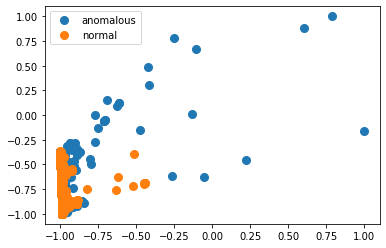

In [34]:
from sklearn.preprocessing import MinMaxScaler
default_scaler = MinMaxScaler(feature_range=(-1,1))

transformed = default_scaler.fit_transform(component_data)
transformed=pd.DataFrame(data=transformed, columns=["one", "two"])
transformed["anomaly"]=cmt_train["anomaly"]

groups = transformed.groupby('anomaly')

fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    label='normal' if name == 1 else "anomalous"
    ax.plot(group.one, group.two, marker='o', linestyle='', ms=8, label=label)
ax.legend()

plt.show()

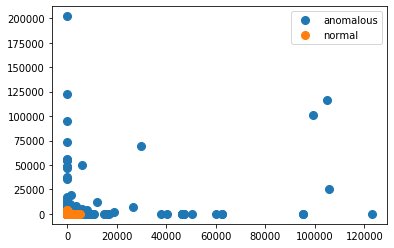

In [37]:
#plotting commits added vs commits removed

commits_added=pd.DataFrame(data=cmt_train[['cmt_added', 'cmt_removed', "anomaly"]])
groups = commits_added.groupby('anomaly')

fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    label='normal' if name == 1 else "anomalous"
    ax.plot(group.cmt_added, group.cmt_removed, marker='o', linestyle='', ms=8, label=label)
ax.legend()

plt.show()

In [38]:
cmt_train[['cmt_added', 'cmt_removed', "anomaly"]]

,cmt_added,cmt_removed,anomaly
0,0,0,1
1,10,3,1
2,12,14,1
3,17,1,1
4,17,19,1
5,2,1,1
6,0,0,1
7,0,0,1
8,0,0,1
9,3,8,1
